# Hyun Ki Kim

# 11/27/2017

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
gss = pd.read_csv('gss2012.csv', index_col='id')

The General Social Survey (GSS) data has 220 variables and 1974 observations.
Although it is a popular dataset in social science, it seems to have several suspicious data points.
If we look at the histogram of number of siblings, there are three observations with 22 siblings but now observations with 23 to 29 siblings. This could imply these 22 siblings were typo of 2 siblings. Therefore, when we are analyzing large dataset, we must pay attention to outliers.

Variable 'happy' was the variable that I found most interesting. People believe happiness is crucial part in life, but it is difficult to measure with observation, or by experiment. Therefore, researchers need to rely on survey to measure happiness of individuals. In GSS survey, respondents had to choose from three options (NOT TOO HAPPY, PRETTY HAPPY, VERY HAPPY). Although the response could be subjective, I would like to use proportion of answer "NOT TO HAPPY" as a approximation for happiness.

In summary, white people were happier than black people, college graduate were the happiest. Number of children does not seem significant in one's happiness. People who are married seem to be the happiest, while people who were separated, widowed, and divorced were unhappy. Also, highest income group seems to have lowest proportion of unhappy people. Age does not seem to be significant in one's happiness level. People who believe post life seems to be happier than those do not believe post life. However, believing god or not doesn't seem to be as significant as believing post life in explaining happiness level. Catholic and Protestant seems to have similar happiness proportions, as well as attitude toward bible. People who oppose capital punishment seem to be feel less happy about themselves. Opinion on sex before marriage does not seem to be statistically significant in explaining happiness level. However, opinion on how people get ahead seems to be statistically significant in explaining happiness level. People who thinks luck or help is important in getting ahead seems to be less happier about their life compared to those who believe hard working is important in getting ahead. In terms of political party affiliation, people who are affiliated with republican party seems to have higher proportion of very happy peoples compared to those who self-identified as independent or democratic party. Also, people who has moderate political view seems to have higher happiness level compared to people who has extreme political view. Respondents those own a gun in their house seems to have lower proportion of 'not too happy'. However, opinion on gun law does not seem to be as significant as owning a gun. Most interestingly, people who scored 7 points on their vocabulary test seems to be the happiest.

After exploring the data, I wanted to find out which variables has a linear relationship with happiness and which variables has a non-linear relationship with proportion of unhappy people. In other words, does ordinary people more/less happier than people far from average, or are they in between two extremes. Subgroup histogram for happiness shows race, education, marital status, income, belief in post life, opinion on hard work, political affiliation, and score on vocabulary test affects on how much unhappy respondents are. For example, 23% of people who had education of less than high school reported they were "NOT TOO HAPPY", while only 9% of people who had college education reported they were "NOT TOO HAPPY". Also, the proportion of unhappiness decreases monotonically as income level increase (15% for low income level to 6% for high income level). However, the proportion of 'not too happy' people does not increase or decrease monotoically as political view changes from extremely liberal to extremly conservative. Among all different political views, slightly conservative respondents had the lowest proportion of unhappy people. Also, the proportion of unhappiness did not change monotonically as score for the vocabulary test increase. The proportion of unhappiness decrease up to a certain score (7.0), but then it rises again. The vocabulary test score showed a non-linear trend unlike education level or income level.

In conclusion, if a variable can explain happiness level, it will have linear or non-linear relationship with proportion of unhappy people. As expected, income or education changes the proportion of unhappy people monotonically as they increases. However, there are some variables such as political view and vocabulary test score that has non-linear relationship with proportion of unhappy people. Usually, the proportion decrease to some point but it rises again after that level. This implies that there is optimal level of such variable that people feel most happy. Political view seems reasonable because people who self-identified as republican had higher happiness level than people who self-identified as a democrat. However, the score on vocabulary test seems to be counterintuitive. This does not correspond with what is shown by education level which was increasing monotonically. The finding implies people feel happier as they know more vocabulary, but after some point people tends to get less happier as they learn more vocabulary. I am suggesting further research on relationship between test scores and the self-reported happiness. Students who get C grades will be happier than those get D grades, but in fact, students who get A grades might not be happier than those got B grades.

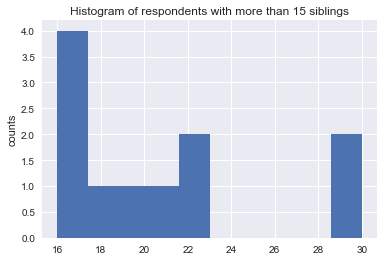

In [3]:
gss[gss['sibs'] > 15]['sibs'].hist()
plt.ylabel('counts')
plt.title('Histogram of respondents with more than 15 siblings')

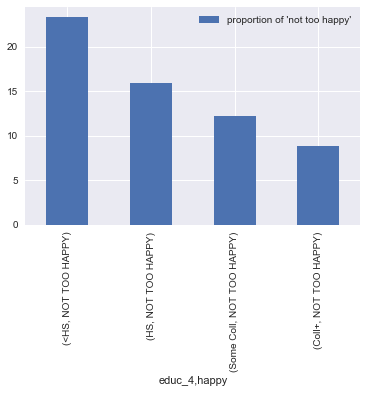

In [4]:
gb = (gss.groupby(['educ_4', 'happy']).size() * 100\
      / gss.groupby(['educ_4']).size()).to_frame("proportion of 'not too happy'")
index = pd.MultiIndex(levels=[['<HS', 'HS', 'Some Coll', 'Coll+'], ['NOT TOO HAPPY', 'PRETTY HAPPY', 'VERY HAPPY']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['educ_4', 'happy'])
gb = gb.reindex(index=index)
not_too_happy = gb[:][0::3]
not_too_happy.plot(kind='bar')

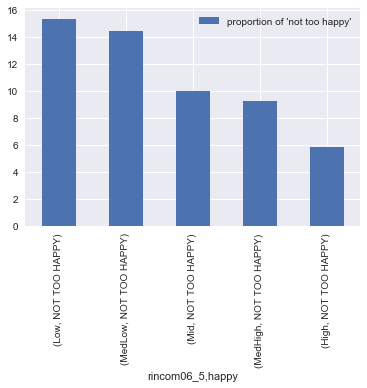

In [5]:
gb = (gss.groupby(['rincom06_5', 'happy']).size() * 100\
      / gss.groupby(['rincom06_5']).size()).to_frame("proportion of 'not too happy'")
index = pd.MultiIndex(levels=[['Low', 'MedLow', 'Mid', 'MedHigh', 'High'], ['NOT TOO HAPPY', 'PRETTY HAPPY', 'VERY HAPPY']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['rincom06_5', 'happy'])
gb = gb.reindex(index=index)
not_too_happy = gb[:][0::3]
not_too_happy.plot(kind='bar')

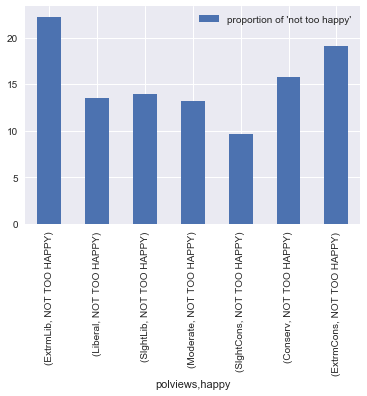

In [6]:
gb = (gss.groupby(['polviews', 'happy']).size() * 100\
      / gss.groupby(['polviews']).size()).to_frame("proportion of 'not too happy'")
gb
index = pd.MultiIndex(levels=[['ExtrmLib', 'Liberal', 'SlghtLib', 'Moderate', 'SlghtCons', 'Conserv', 'ExtrmCons'], ['NOT TOO HAPPY', 'PRETTY HAPPY', 'VERY HAPPY']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['polviews', 'happy'])
gb = gb.reindex(index=index)
not_too_happy = gb[:][0::3]
not_too_happy.plot(kind='bar')

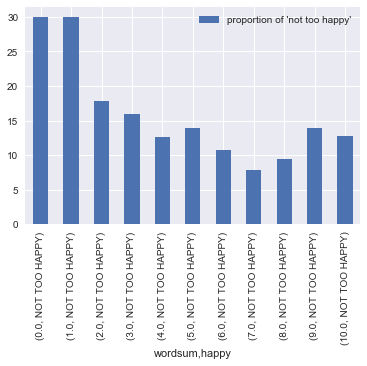

In [7]:
gb = (gss.groupby(['wordsum', 'happy']).size() * 100\
      / gss.groupby(['wordsum']).size()).to_frame("proportion of 'not too happy'")
not_too_happy = gb[:][0::3]
not_too_happy.plot(kind='bar')